In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling

In [2]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_colwidth',1000)
from matplotlib.font_manager import FontProperties
chinese = FontProperties(fname = 'C:/Windows/Fonts/msyh.ttc')
plt.rcParams['font.sans-serif'] = [u'SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [3]:
def PhoneSheng(data):
    data['phoneregion'] = data['phoneregion'].fillna("空")
    data["PhoneSheng"] = data['phoneregion'].apply(lambda x:x[:2])
    data['province'] = data['province'].fillna("kong")
    data = data[data['province'].str.contains('kong') == False]
    data = data[(data["age"] > 0) & (data["age"] < 100)]
    data['gender'] = data['gender'].fillna("kong")
    data = data[data['gender'].str.contains('kong') == False]
    return data

In [4]:
customers01 = pd.read_csv('D:/work/datasets/info/qrcode201901SUM.csv')
data1 = PhoneSheng(customers01)
df1 = data1.sample(n = 20000,replace = False,axis = 0,random_state = 444)

In [5]:
customers02 = pd.read_csv('D:/work/datasets/info/qrcode201902SUM.csv')
data2 = PhoneSheng(customers02)
df2 = data2.sample(n = 20000,replace = False,axis = 0,random_state = 444)

In [6]:
customers03 = pd.read_csv('D:/work/datasets/info/qrcode201903SUM.csv')
data3 = PhoneSheng(customers03)
df3 = data3.sample(n = 20000,replace = False,axis = 0,random_state = 444)

In [7]:
customers04 = pd.read_csv('D:/work/datasets/info/qrcode201904SUM.csv')
data4 = PhoneSheng(customers04)
df4 = data4.sample(n = 20000,replace = False,axis = 0,random_state = 444)

In [8]:
customers05 = pd.read_csv('D:/work/datasets/info/qrcode201905SUM.csv')
data5 = PhoneSheng(customers05)
df5 = data5.sample(n = 20000,replace = False,axis = 0,random_state = 444)

In [9]:
customers06 = pd.read_csv('D:/work/datasets/info/qrcode201906SUM.csv')
data6 = PhoneSheng(customers06)
df6 = data6.sample(n = 20000,replace = False,axis = 0,random_state = 444)

In [10]:
print("df1:" + str(df1.shape))
print("df2:" + str(df2.shape))
print("df3:" + str(df3.shape))
print("df4:" + str(df4.shape))
print("df5:" + str(df5.shape))
print("df6:" + str(df6.shape))

df1:(20000, 14)
df2:(20000, 14)
df3:(20000, 14)
df4:(20000, 14)
df5:(20000, 14)
df6:(20000, 14)


In [11]:
print("样本数：" + str(df1.shape[0] 
                   + df2.shape[0] + df3.shape[0] + df4.shape[0]
                   + df5.shape[0] + df6.shape[0]))

样本数：120000


In [12]:
df = pd.concat([df1,df2,df3,df4,df5,df6])
df.shape

(120000, 14)

In [13]:
df.columns

Index(['card_num', 'credit_point_start_date', 'credit_point', 'trans_count',
       'actual_payment', 'user_id', 'province', 'city', 'gender', 'age',
       'phonebrand', 'phonecarrier', 'phoneregion', 'PhoneSheng'],
      dtype='object')

In [14]:
df.head()

,card_num,credit_point_start_date,credit_point,trans_count,actual_payment,user_id,province,city,gender,age,phonebrand,phonecarrier,phoneregion,PhoneSheng
2973737,10100053205008504380,20190101000000,3300,11,3300,10441254.0,内蒙古,巴彦淖尔盟,F,29.0,Apple,NaN,空,空
2248725,10100053205008434002,20190101000000,600,1,600,10359865.0,吉林,长春,M,35.0,Apple,NaN,空,空
74007,10100053205001357739,20190101000000,7600,22,12600,2587183.0,江西,南昌,M,25.0,Apple,联通,北京,北京
1266634,10100053205001243169,20190101000000,2600,7,2600,2462190.0,辽宁,辽阳,M,26.0,Apple,移动,北京,北京
3366831,10100053205008038297,20190101000000,7400,18,7400,10000679.0,河北,石家庄,F,26.0,Xiaomi,NaN,空,空


In [15]:
data = df[["user_id","credit_point_start_date","actual_payment","province","age","gender"]]

In [16]:
data.shape

(120000, 6)

In [17]:
data = data.reset_index(drop=True)

In [18]:
data["yuan"] = data["actual_payment"] / 100
data["yuan"] = data["yuan"].astype("int")
data = data.drop(columns=["actual_payment"])

In [19]:
data["user_id"] = data["user_id"].astype("str")

In [20]:
data["age"] = data["age"][:-2].astype("int")

In [21]:
data["credit_point_start_date"] = pd.to_datetime(data["credit_point_start_date"])

In [22]:
data.head()

,user_id,credit_point_start_date,province,age,gender,yuan
0,10441254.0,1970-01-01 05:36:30.101,内蒙古,29.0,F,33
1,10359865.0,1970-01-01 05:36:30.101,吉林,35.0,M,6
2,2587183.0,1970-01-01 05:36:30.101,江西,25.0,M,126
3,2462190.0,1970-01-01 05:36:30.101,辽宁,26.0,M,26
4,10000679.0,1970-01-01 05:36:30.101,河北,26.0,F,74


In [23]:
data.describe()

,age,yuan
count,119998.000000,120000.000000
mean,30.339156,55.908250
std,9.224585,62.352574
min,10.000000,0.000000
25%,24.000000,10.000000
50%,28.000000,26.000000
75%,35.000000,84.000000
max,91.000000,821.000000


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 6 columns):
user_id                    120000 non-null object
credit_point_start_date    120000 non-null datetime64[ns]
province                   120000 non-null object
age                        119998 non-null float64
gender                     120000 non-null object
yuan                       120000 non-null int32
dtypes: datetime64[ns](1), float64(1), int32(1), object(3)
memory usage: 5.0+ MB


In [25]:
# profile = data.profile_report(title = "二维码用户分析抽样1")

In [26]:
# profile.to_file(output_file="D:/work/datasets/info/二维码用户分析抽样120000.html")

## EDA

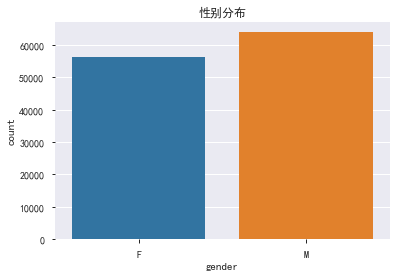

In [27]:
# 性别分布
sns.countplot(x='gender', data=data);
plt.title('性别分布');

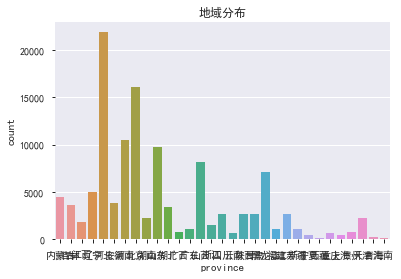

In [28]:
# 地域分布
sns.countplot(x='province', data=data);
plt.title('地域分布');

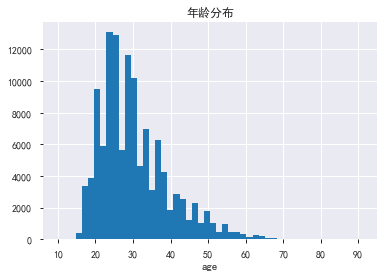

In [29]:
# Histogram of ages
data.hist('age', bins=50);
plt.title('年龄分布');
plt.xlabel('age');

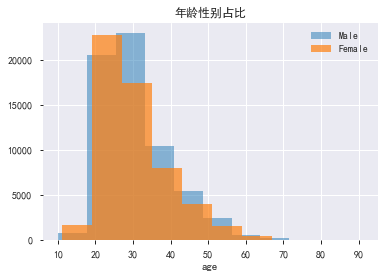

In [31]:
plt.hist('age', data=data[data['gender'] == 'M'], alpha=0.5, label='Male');
plt.hist('age', data=data[data['gender'] == 'F'], alpha=0.7, label='Female');
plt.title('年龄性别占比');
plt.xlabel('age');
plt.legend();

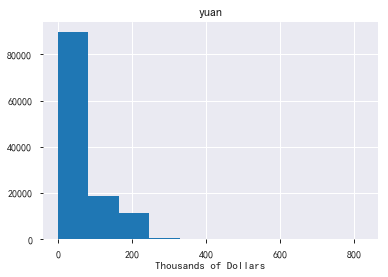

In [33]:
# 消费分布
data.hist('yuan');
plt.title('yuan');
plt.xlabel('Thousands of Dollars');